In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
# Convert date to datetime format and show dataset information
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106


In [6]:
# checking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Splitting Date and create new columns (Day, Month, and Year)
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [8]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum()
store_with_max_sales = store_sales.idxmax()
max_sales = store_sales.max()
print(" Store with max sales:",max_sales )


 Store with max sales: 301397792.46000004


In [9]:
store_with_min_sales = store_sales.idxmin()
min_sales = store_sales.min()
print(" Store with min sales:",min_sales )


 Store with min sales: 37160221.960000016


In [10]:
plt.figure(figsize=(15,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

<Figure size 1080x504 with 0 Axes>

Which store has minimum and maximum sales?

<class 'numpy.float64'>


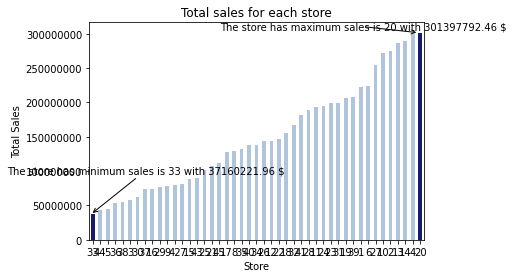

In [11]:
# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

In [12]:
store_std = df.groupby("Store")["Weekly_Sales"].std()
store_with_max_std = store_std.idxmax()
max_std = store_std.max()
print("Store with maximum standard deviation:", store_with_max_std)

Store with maximum standard deviation: 14


In [13]:
store_data = df[df["Store"] == store_with_max_std]


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


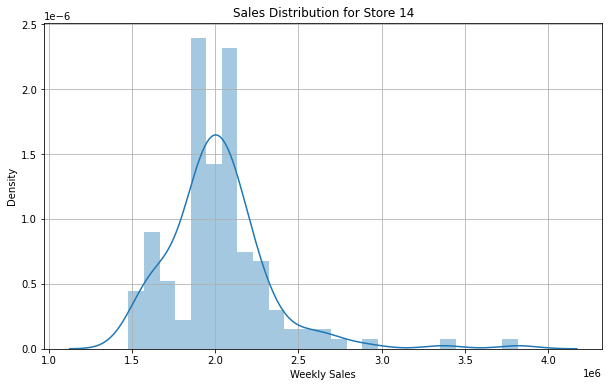

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(store_data["Weekly_Sales"])
plt.title("Sales Distribution for Store {}".format(store_with_max_std))
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [15]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


In [16]:
# Group the data by store and calculate mean and standard deviation of sales
store_stats = df.groupby("Store")["Weekly_Sales"].agg(["mean", "std"])

In [17]:
# Calculate the coefficient of mean to standard deviation (coefficient of variation)
store_stats["coefficient_of_variation"] = store_stats["mean"] / store_stats["std"]

In [18]:
# Find the store with the maximum coefficient of variation
store_with_max_cv = store_stats["coefficient_of_variation"].idxmax()
max_cv = store_stats.loc[store_with_max_cv, "coefficient_of_variation"]

In [19]:
print("Maximum coefficient of variation:", max_cv)

Maximum coefficient of variation: 23.761932646021123


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


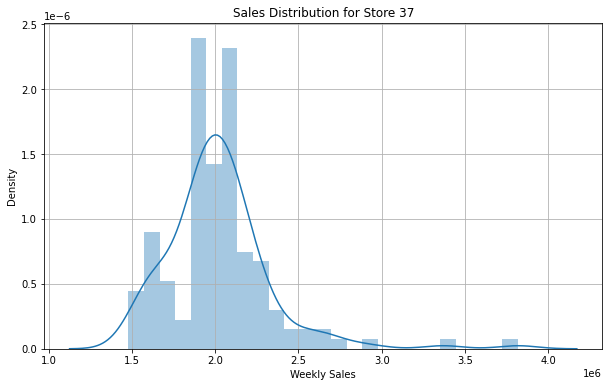

In [20]:
plt.figure(figsize=(10, 6))
sns.distplot(store_data["Weekly_Sales"])
plt.title("Sales Distribution for Store {}".format(store_with_max_cv))
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Which store/s has good quarterly growth rate in Q3’2012


In [21]:
# Filter the sales data for Q3'2012
q3_2012_data = df[(df["Date"].dt.year == 2012) & (df["Date"].dt.quarter == 3)]

In [22]:
# Group the data by store and calculate the quarterly growth rate
store_growth = q3_2012_data.groupby("Store")["Weekly_Sales"].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

In [23]:
# Find stores with positive quarterly growth rate
stores_with_growth = store_growth[store_growth > 0]

In [24]:
print(stores_with_growth)

Store
15     1.610891
17    13.076958
23     2.035248
25     6.150163
32     2.896583
35     2.228729
39     1.689103
41     5.154565
44    17.093989
Name: Weekly_Sales, dtype: float64


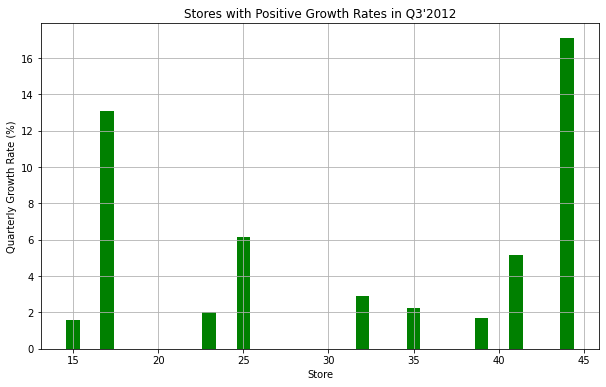

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(stores_with_growth.index, stores_with_growth.values, color='green')
plt.title("Stores with Positive Growth Rates in Q3'2012")
plt.xlabel("Store")
plt.ylabel("Quarterly Growth Rate (%)")
plt.grid(True)
plt.show()

Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [27]:
# Filter the data for non-holiday weeks and calculate the mean sales
non_holiday_mean = df[df["Holiday_Flag"] == 0]["Weekly_Sales"].mean()

In [30]:
# Filter the data for holiday weeks and calculate the mean sales for each holiday
holiday_means = df[df["Holiday_Flag"] == 1].groupby("Date")["Weekly_Sales"].mean()

In [31]:
# Find holidays with higher sales than the mean sales in non-holiday season
holidays_higher_than_mean = holiday_means[holiday_means > non_holiday_mean]

In [32]:
print(holidays_higher_than_mean)

Date
2010-11-26    1.462689e+06
2010-12-02    1.074148e+06
2011-11-02    1.051915e+06
2011-11-25    1.479858e+06
2012-07-09    1.074001e+06
2012-10-02    1.111320e+06
Name: Weekly_Sales, dtype: float64


In [33]:
# Filter the sales data for each holiday type
super_bowl_data = df[df["Holiday_Flag"] & (df["Date"].isin(["2010-02-12", "2011-02-11", "2012-02-10"]))] 
labour_day_data = df[df["Holiday_Flag"] & (df["Date"].isin(["2010-09-10", "2011-09-09", "2012-09-07"]))] 
thanksgiving_data = df[df["Holiday_Flag"] & (df["Date"].isin(["2010-11-26", "2011-11-25", "2012-11-23"]))] 
christmas_data = df[df["Holiday_Flag"] & (df["Date"].isin(["2010-12-31", "2011-12-30", "2012-12-28"]))] 

In [34]:
# Calculate the mean sales for each holiday type
super_bowl_mean = super_bowl_data.groupby("Date")["Weekly_Sales"].mean()
labour_day_mean = labour_day_data.groupby("Date")["Weekly_Sales"].mean()
thanksgiving_mean = thanksgiving_data.groupby("Date")["Weekly_Sales"].mean()
christmas_mean = christmas_data.groupby("Date")["Weekly_Sales"].mean()

<AxesSubplot:title={'center':'Yearly Sales in Christmas holiday'}, xlabel='Year'>

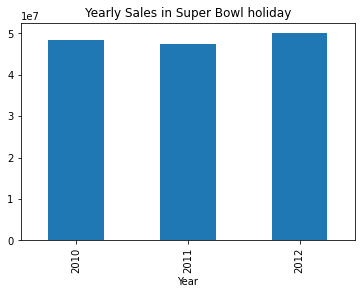

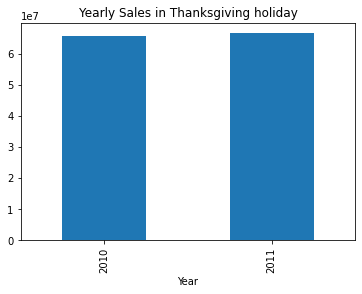

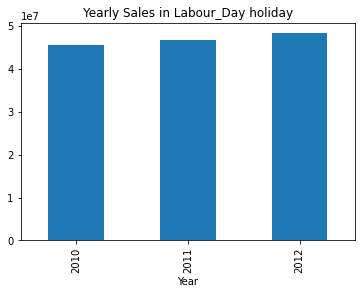

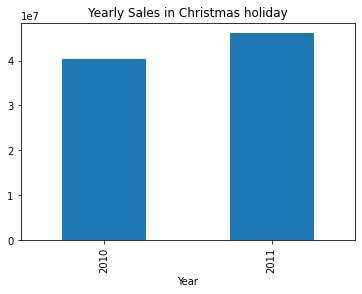

In [42]:
Super_Bowl_df = pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(df.loc[df.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(df.loc[df.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())


Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

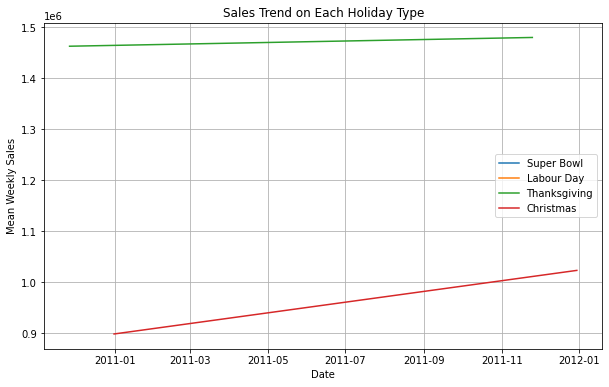

In [35]:
# Plot the sales trend for each holiday type
plt.figure(figsize=(10, 6))
plt.plot(super_bowl_mean.index, super_bowl_mean.values, label="Super Bowl")
plt.plot(labour_day_mean.index, labour_day_mean.values, label="Labour Day")
plt.plot(thanksgiving_mean.index, thanksgiving_mean.values, label="Thanksgiving")
plt.plot(christmas_mean.index, christmas_mean.values, label="Christmas")
plt.title("Sales Trend on Each Holiday Type")
plt.xlabel("Date")
plt.ylabel("Mean Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


In [39]:
total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

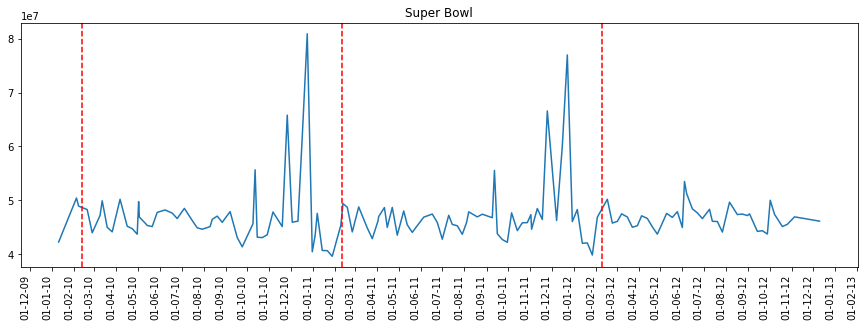

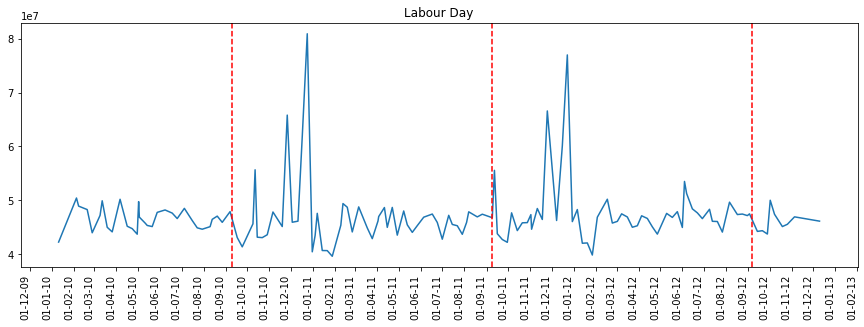

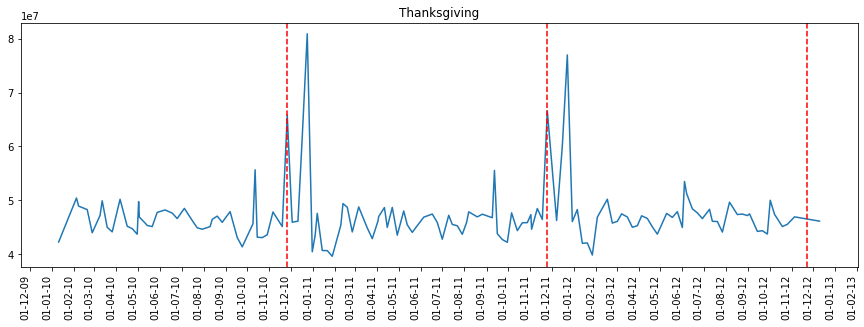

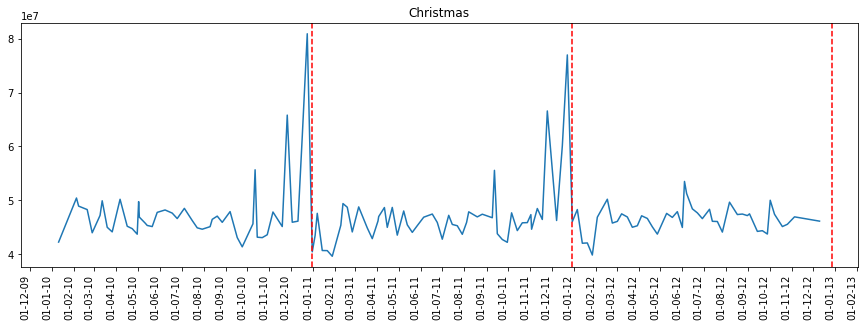

In [40]:
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

Q5: Provide a monthly and semester view of sales in units and give insights

In [45]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
# Resample the data on a monthly basis to calculate total sales for each month
monthly_sales = df.resample("M")["Weekly_Sales"].sum()

In [46]:
# Resample the data on a semester basis to calculate total sales for each semester
semester_sales = df.resample("6M")["Weekly_Sales"].sum()

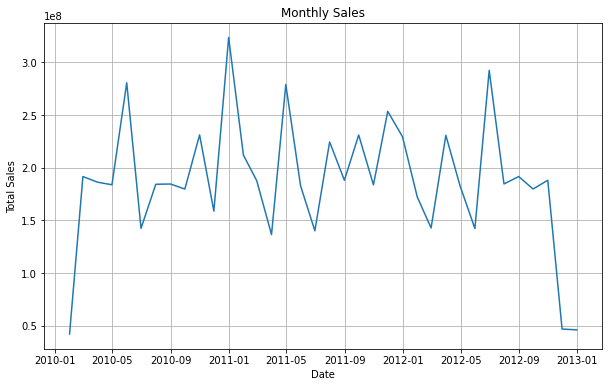

In [47]:
# Plot the monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

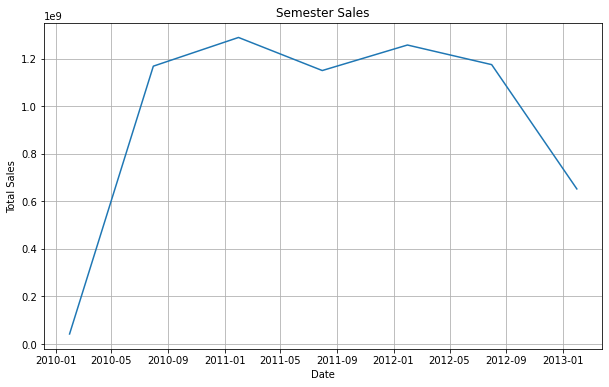

In [48]:
# Plot the semester sales data
plt.figure(figsize=(10, 6))
plt.plot(semester_sales.index, semester_sales.values)
plt.title("Semester Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [49]:
# Provide insights based on the sales trends
monthly_sales_mean = monthly_sales.mean()
semester_sales_mean = semester_sales.mean()


In [50]:
print("Average monthly sales: ", monthly_sales_mean)
print("Average semester sales: ", semester_sales_mean)

Average monthly sales:  187144971.86416662
Average semester sales:  962459855.3014281


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn

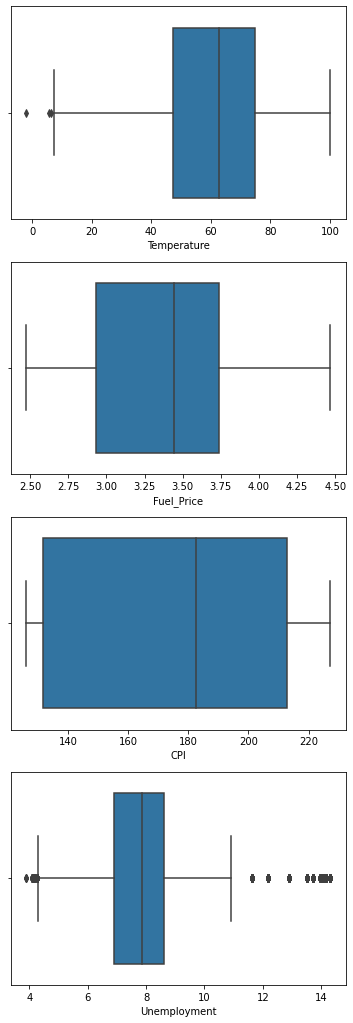

In [51]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

In [54]:
# drop the outliers     
df = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn

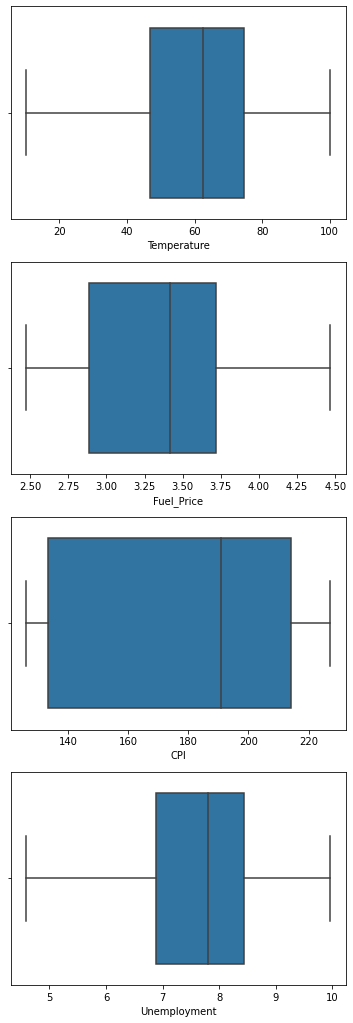

In [56]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

Building model

In [59]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [60]:
# Select features and target 
X = df[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [61]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


Linear Regression:

Accuracy: 13.54426145850528


Mean Absolute Error: 453254.98996341514
Mean Squared Error: 302364524014.50336
Root Mean Squared Error: 549876.8262206577


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


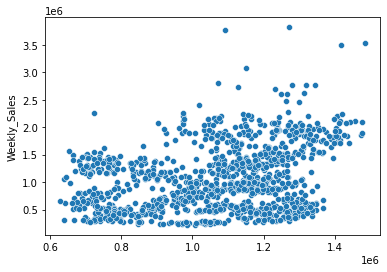

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 94.2896058424671
Mean Absolute Error: 70803.25902171675
Mean Squared Error: 19246618028.373486
Root Mean Squared Error: 138732.18094001652


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


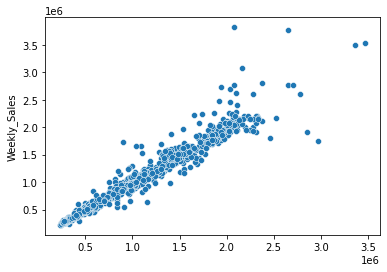

In [63]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

In [ ]:
Random Forest is the best model with accuracy 94%